In [4]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator
%matplotlib inline

In [5]:
np.random.seed(2048)

In [6]:
def J_for_plot(X, Y):
    J = np.empty((theta0.shape[0], theta1.shape[0]))
    for j in range(len(theta1)):
        for i in range(len(theta0)):
            Theta = np.append([], [theta0[i], theta1[j]], axis=0)
            J_ = 1/(2*m) * np.dot((np.dot(X, Theta) - Y).T, (np.dot(X, Theta) - Y))
            J[i, j] = J_
    return(J)

In [7]:
def Theta_learning(X, Y, Theta_init, alpha, num_iter):
    m = Y.shape[0]
    Theta_ans = np.array([Theta_init])
    for i in range(num_iter):
        Theta_prev = Theta_ans[-1]
        Theta_new = Theta_prev - alpha/m * np.dot(X.T, (np.dot(X, Theta_prev) - Y))
        Theta_ans = np.concatenate((Theta_ans, np.array([Theta_new])), axis=0)
    return Theta_ans

In [8]:
x = np.arange(-0.7, 3, 0.1)
x = np.reshape(x, (len(x), 1))
y = np.sin(x) + 2
noise = np.random.normal(scale=0.2, size=y.shape)
y = y + noise

In [9]:
x.shape

(37, 1)

In [7]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print(model.intercept_, model.coef_)

[2.07300822] [[0.31103632]]


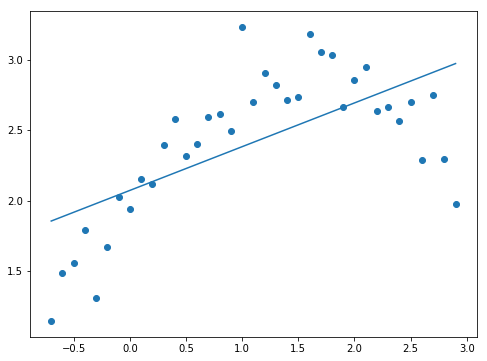

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(x, y_pred)

In [9]:
m = len(y)
print(m)

37


In [10]:
theta0 = np.arange(-10, 10, 0.5)
theta1 = np.arange(-10, 10, 0.5)

In [11]:
Y = y.reshape((len(y),))

In [12]:
X_nscal = np.concatenate((np.ones((x.shape)), x), axis=1)
J_nscal = J_for_plot(X_nscal, Y)
Theta_nscal = Theta_learning(X_nscal, Y, [-7.8, -7.8], alpha=0.57, num_iter=100)

In [13]:
X_scal = np.concatenate((np.ones((x.shape)), scale(x)), axis=1)
J_scal = J_for_plot(X_scal, Y)
Theta_scal = Theta_learning(X_scal, Y, [-7.8, -7.8], alpha=0.57, num_iter=100)

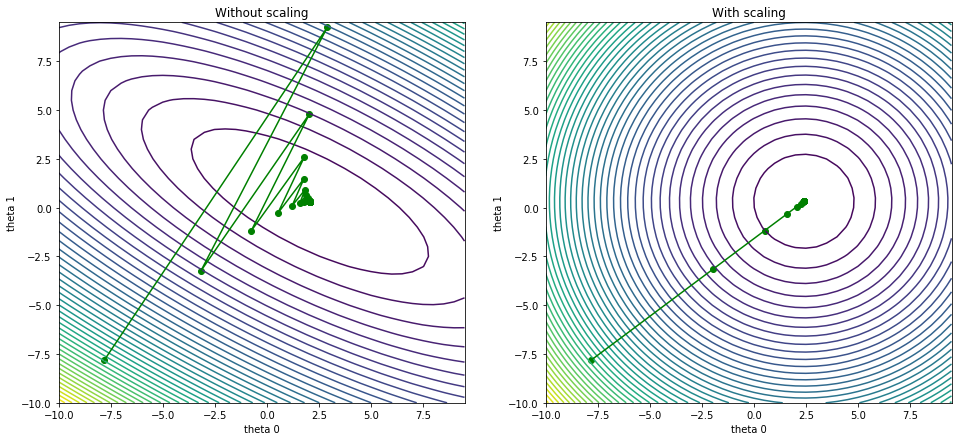

In [27]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.contour(theta0, theta1, J_nscal.T, 50)
plt.plot(Theta_nscal[:,0], Theta_nscal[:,1], color='green')
plt.scatter(Theta_nscal[:,0], Theta_nscal[:,1], color='green')
plt.title('Without scaling')
plt.xlabel('theta 0')
plt.ylabel('theta 1')

plt.subplot(1, 2, 2)
plt.contour(theta0, theta1, J_scal.T, 50)
plt.plot(Theta_scal[:,0], Theta_scal[:,1], color='green')
plt.scatter(Theta_scal[:,0], Theta_scal[:,1], color='green')
plt.title('With scaling')
plt.xlabel('theta 0')
plt.ylabel('theta 1')
plt.savefig('scaling')

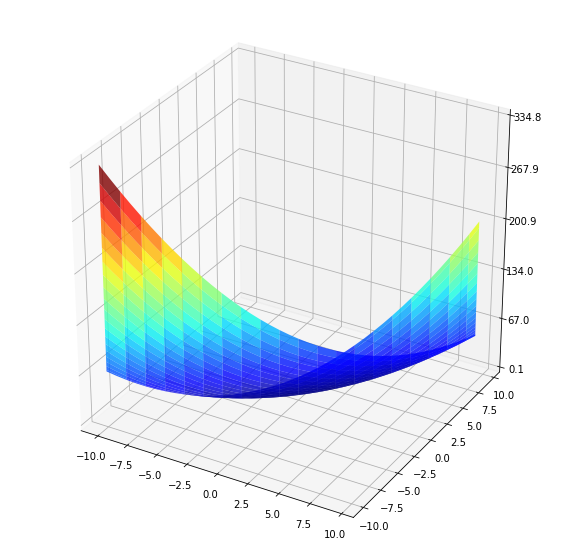

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
colortuple = ('r', 'g')
xlen = len(theta0)
ylen = len(theta1)
colors = np.empty((theta0.shape[0], theta1.shape[0]), dtype=str)
for j in range(ylen):
    for i in range(xlen):
        colors[i, j] = colortuple[(i + j) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(theta0, theta1, J_nscal, rstride=2, cstride=2, alpha=0.8, cmap=plt.cm.jet)

# Customize the z axis.
ax.w_zaxis.set_major_locator(LinearLocator(6))